# Visualize read counts per individual & locus

In [2]:
import os

input_dir='../haplotype_pipeline/intermediates_illumina/alignments/'
bam_files = [os.path.join(input_dir,file) for file in os.listdir(input_dir) if file.endswith('.sorted.bam')]

## Count reads

In [3]:
import collections
import HTSeq

read_counts = dict()
for filename in bam_files:
    sample_id = filename.split('/')[-1].strip('.sorted.bam')
    bam = HTSeq.BAM_Reader(filename)
    read_counts[sample_id] = collections.Counter(aln.iv.chrom for aln in bam if aln.iv)
print(read_counts)

{'1319': Counter({'E16A12': 3674, 'E13C7': 3088, 'E24C10': 2511, 'E14G10': 2423, 'E12E3': 2406, 'E15A11': 2365, 'E15G5': 2061, 'E14A8': 1788, 'E20C2': 1740, 'E12C6': 1690, 'E7G8': 1606, 'E7A5': 1599, 'E22A7': 1595, 'E16C7': 1547, 'E12G5': 1538, 'E12A9': 1502, 'E20E5': 1459, 'E17G3': 1408, 'E17C12': 1386, 'E12C2': 1361, 'E15A2': 1360, 'E20G5': 1356, 'E24A6': 1343, 'E14A6': 1204, 'E18C7': 1193, 'E8G11': 1173, 'E13C1': 1135, 'E14A2': 1057, 'E15E12': 1048, 'E23G7': 1024, 'E14E2': 1008, 'E24G3': 966, 'E20A8': 963, 'MGF': 960, 'E12G1': 911, 'E12A4': 905, 'E13A6': 897, 'E19E12': 831, 'E14E3': 828, 'ctg325': 820, 'E12A3': 812, 'E14G11': 805, 'E10C5': 786, 'E14A1': 784, 'E6E7': 763, 'E8E1': 763, 'E12G2': 742, 'E19E7': 734, 'E23G1': 734, 'WNT1': 712, 'E13E2': 692, 'E12C3': 682, 'E13A3': 672, 'E15E2': 672, 'E24E9': 666, 'E18C3': 594, 'E17A2': 590, 'E12C11': 578, 'E11G6': 574, 'E23C6': 533, 'E20C1': 525, 'E6C8': 525, 'E21A3': 516, 'E7G10': 507, 'E7C12': 503, 'E12G12': 499, 'E16A9': 497, 'E10C11': 

## Save counts

In [4]:
import pandas as pd

df = pd.DataFrame(read_counts)
df.to_csv("../results/read_counts.csv")
df.head()

,1319,1299
E10A7,244,274.0
E10C11,494,598.0
E10C5,786,640.0
E10C6,378,185.0
E10E9,76,793.0


## Make plots

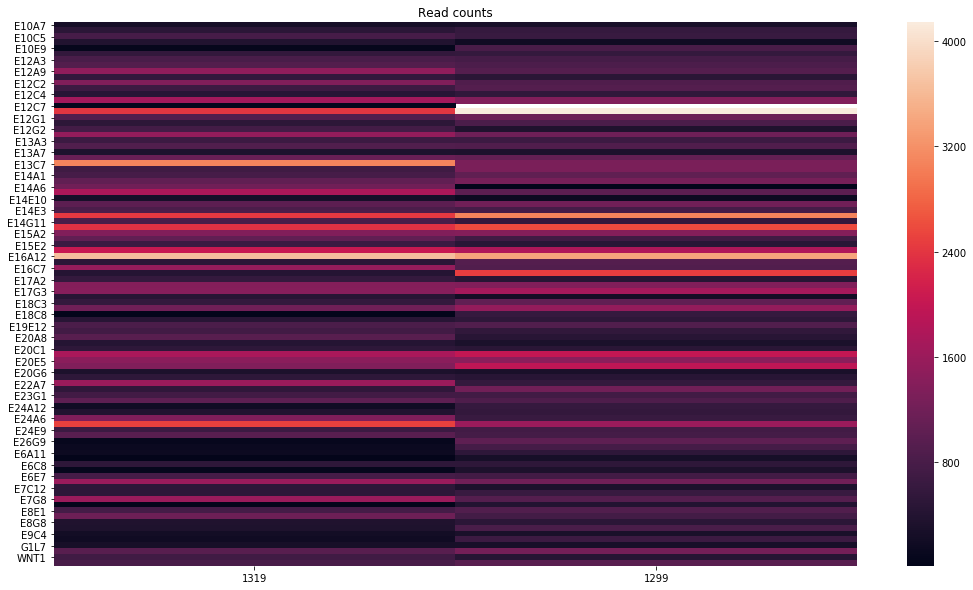

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, axis = plt.subplots(figsize=(18,10))
sns.heatmap(df, ax=axis)
axis.set_title("Read counts")
plt.savefig('../figures/reads_heatmap.svg', format='svg')

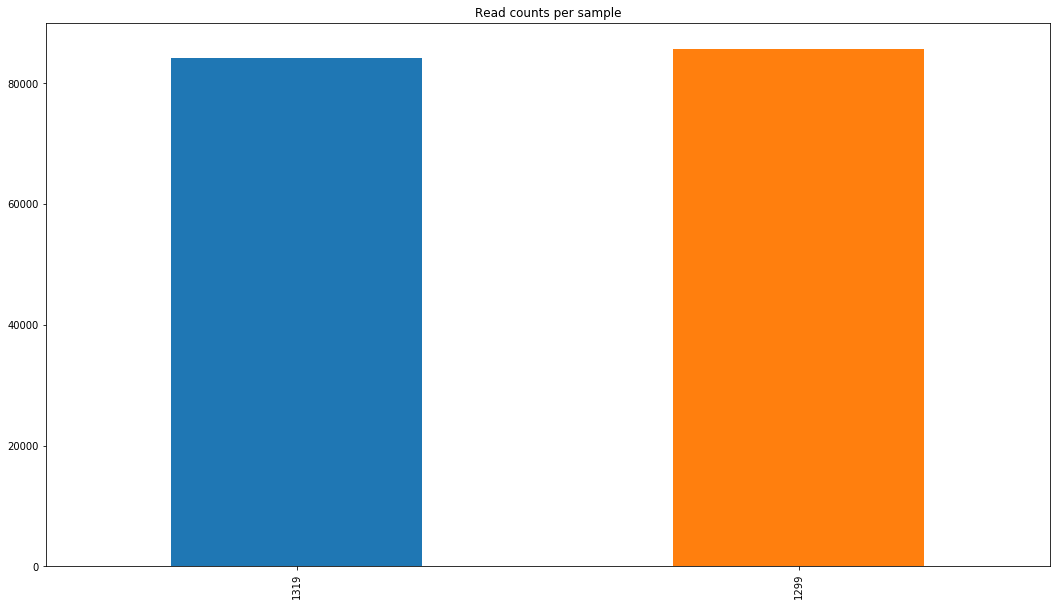

In [6]:
sample_read_counts = df.sum()
sample_read_counts.plot(kind='bar', title='Read counts per sample', figsize=(18,10))
plt.savefig('../figures/reads_samples.svg', format='svg')

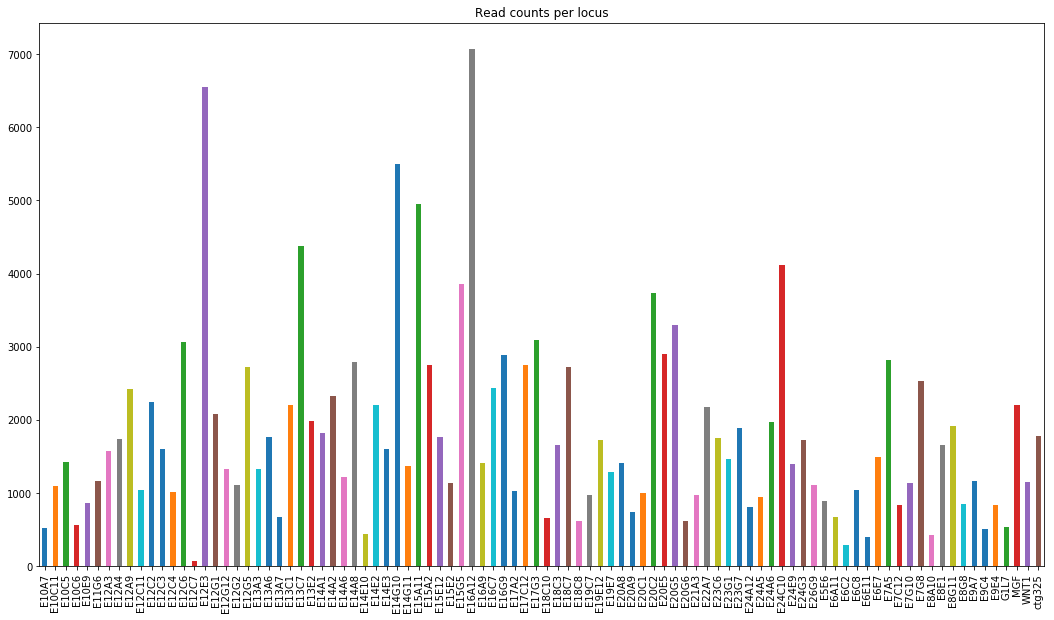

In [7]:
locus_read_counts = df.sum(axis=1)
locus_read_counts.plot(kind='bar', title='Read counts per locus', figsize=(18,10))
plt.savefig('../figures/reads_loci.svg', format='svg')

In [9]:
df = pd.read_csv('../results/read_counts.csv', index_col=0)
df.head()

,1319,1299
E10A7,244,274.0
E10C11,494,598.0
E10C5,786,640.0
E10C6,378,185.0
E10E9,76,793.0
